# TD2: Générateurs pseudo-aléatoires (RICM4, 2013)



L'objectif de cette fiche est de présenter les méthodes principales de génération de nombres pseudo-aléatoires, de comprendre leurs limitations, d'apprendre à s'en méfier et de voir comment éventuellement les corriger...


# Générateurs à base de congruence

In [1]:
congruent_random <- function(n = 100, a=4, b=2, m=9, x1=1) {
  res = c(x1)
  for(i in 2:n) {
    res[i] = (a * res[i-1] + b) %% m
  }
  res
}

Regardons les premières valeurs

In [2]:
congruent_random(10)

[1] 1 6 8 7 3 5 4 0 2 1

Regardons maintenant graphiquement ces valeurs

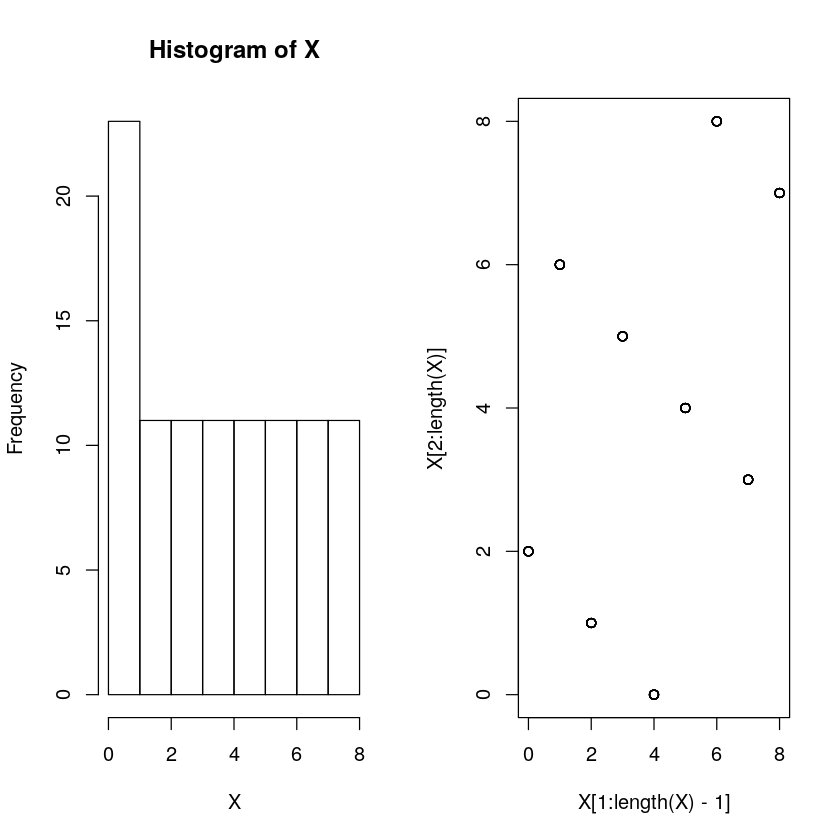

In [3]:
graphical_check <- function(X) {
  par(mfrow=c(1,2))
  hist(X)
  plot(X[1:length(X)-1],X[2:length(X)])
}
graphical_check(congruent_random(100))

Évidemment, l'espace d'état est trop petit. Essayons avec d'autres paramètres.

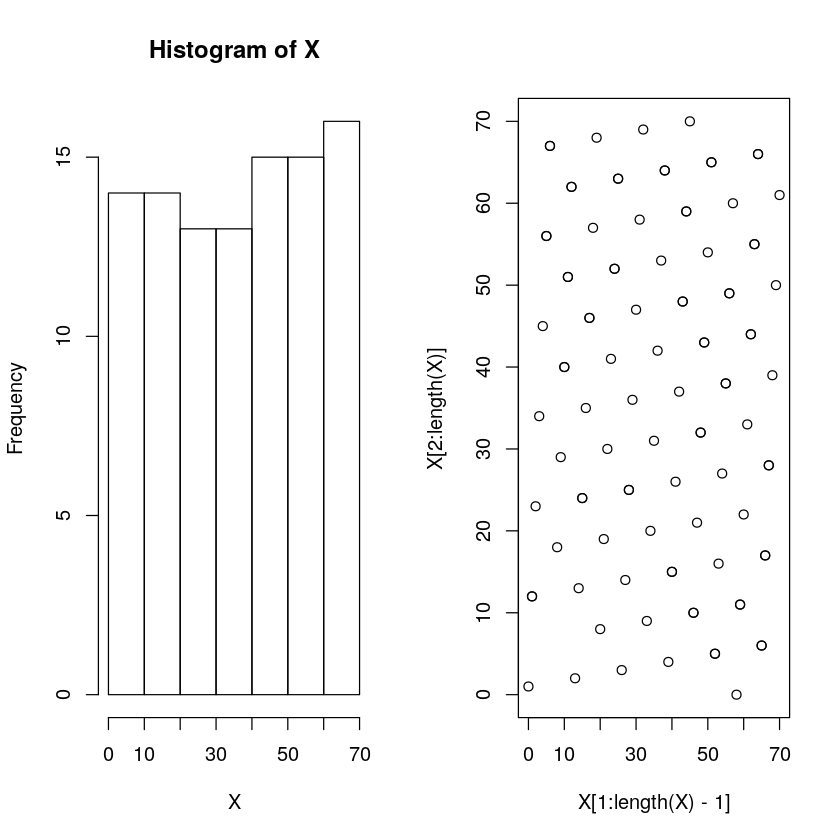

In [4]:
graphical_check(congruent_random(n=100,a=11,b=1,m=71))

Cela parait mieux mais en s'intéressant à la corrélation et à la covariance entre $X_n$ et $X_{n+1}$, le fait que nos nombres ne sont pas indépendants les uns des autres est plus évident.

In [11]:
X <- congruent_random(n=1000,a=11,b=1,m=71)
cor(X[1:length(X)-1],X[2:length(X)])
cov(X[1:length(X)-1],X[2:length(X)])

[1] 0.04577509

[1] 19.09131

Il faut donc être suspicieux avec les générateurs de nombres alétaoires et leur faire subir plusieurs tests.

## Générateurs à décalage de registres

In [6]:
X=xor_random <- function(n = 100, filter=c(1,0,1,0), seed=c(1,0,1,0)) {
  res = seed
  m = length(filter)
  print(m)
  for(i in (length(seed)):(n-1)) {    # Yes, you need to put parenthesis around n-1 :(
    res[i+1] = sum(filter*(res[(i-m+1):i]))%%2 # Yes, you need to put parenthesis around i-m+1 :(
  }
  res
}
xor_random()
xor_random(seed=c(1,0,0,1))

[1] 4


[1] 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1
 [38] 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0
 [75] 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0

[1] 4


[1] 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1
 [38] 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
 [75] 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1

Ouh là, tout ceci n'a rien d'aléatoire. Il y a deux séquences entrelacées et la longueur du cycle est 8. Essayons avec d'autres paramètres.

In [7]:
xor_random(filter=c(1,1,0,0),seed=c(1,1,0,1))

[1] 4


[1] 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1
 [38] 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0
 [75] 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0

Cela semble mieux, la longueur du cycle est de 16. Est-ce satisfaisant pour autant ? À vous de voir... À vous de concevoir de nouveaux algorithmes de génération et d'imaginer des tests d'aléa..

![Well, maybe those numbers are just intrinsically better!](http://imgs.xkcd.com/comics/ayn_random.png)